Import

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

Load Data

In [2]:
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('./Data/datavf.csv')

x=data.iloc[:, :-2]
y = data.account_type.values.tolist()

In [3]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

Split the data into training and testing sets

Train the Logistic Regression model

In [4]:
lr = LogisticRegression(random_state=48,solver="liblinear")
lr.fit(x_train,y_train)

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)


Calculate the accuracy of the model

In [5]:
def accurracy(y_true,y_pred_test):
    return np.sum(y_true==y_pred_test)/len(y_true)
print('Accuracy  classification :',accurracy(y_test,y_pred_test))


Accuracy  classification : 0.7


Calculate the classification report of the model

classification_report 
               precision    recall  f1-score   support

         bot       0.74      0.69      0.71      3447
       human       0.85      0.87      0.86      6767

    accuracy                           0.81     10214
   macro avg       0.79      0.78      0.79     10214
weighted avg       0.81      0.81      0.81     10214




Training Accuracy score: 0.7089772727272727
Testing Accuracy score: 0.7
classification_report 
               precision    recall  f1-score   support

           0       0.63      0.94      0.75      2158
           1       0.89      0.47      0.62      2242

    accuracy                           0.70      4400
   macro avg       0.76      0.70      0.68      4400
weighted avg       0.76      0.70      0.68      4400



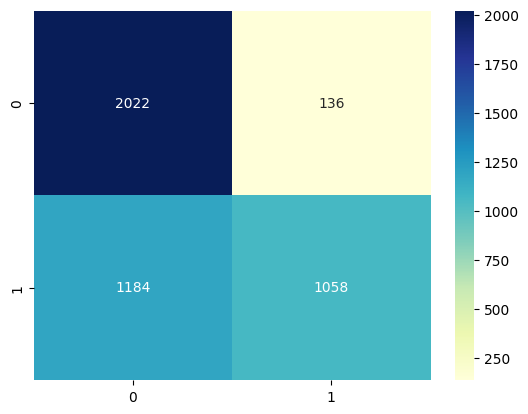

In [6]:
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


with StandardScaler et dimensionality reduction techniques.

Accuracy: 78.16%

Training Accuracy score: 0.7781818181818182
Testing Accuracy score: 0.7815909090909091
DecisionTreeClassifier score: 0.7781818181818182
classification_report 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      2200
           1       0.77      0.80      0.78      2200

    accuracy                           0.78      4400
   macro avg       0.78      0.78      0.78      4400
weighted avg       0.78      0.78      0.78      4400



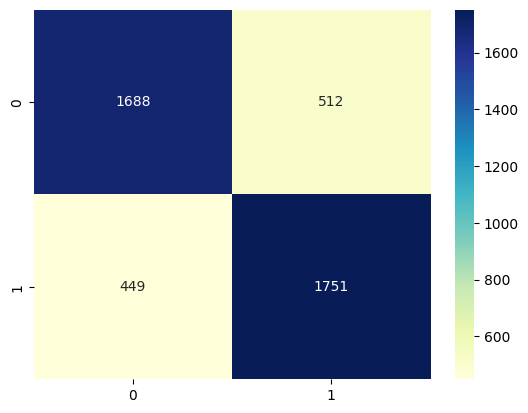

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('./Data/datavf.csv')

x=df.iloc[:, :-2]
y = df.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf', LogisticRegression(solver="liblinear")) # Training a random forest classifier on the data
])

pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("DecisionTreeClassifier score:",pipeline.score(x_train, y_train))
print("classification_report \n "+classification_report(y_test, y_pred_test))

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()